In [1]:
import pandas as pd

In [2]:
# Configura Pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 1000)  # Ajusta el ancho para evitar el corte de columnas
pd.set_option('display.max_colwidth', None)  # Muestra el contenido completo de las celdas

In [3]:
df = pd.read_csv('C:/Users/bhgtb/OneDrive - unimilitar.edu.co/Doctorado/Electiva IA/EDWARD (6).txt', sep="\s+", header=None, engine='python')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bhgtb\AppData\Local\Temp\ipykernel_2328\2291167355.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('C:/Users/bhgtb/OneDrive - unimilitar.edu.co/Doctorado/Electiva IA/EDWARD (6).txt', sep="\s+", header=None, engine='python')


In [4]:
# 2) Asignar nombres a las columnas
df.columns = ["Electrocardiograma", "Respiracion"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Electrocardiograma  12000 non-null  float64
 1   Respiracion         12000 non-null  float64
dtypes: float64(2)
memory usage: 187.6 KB


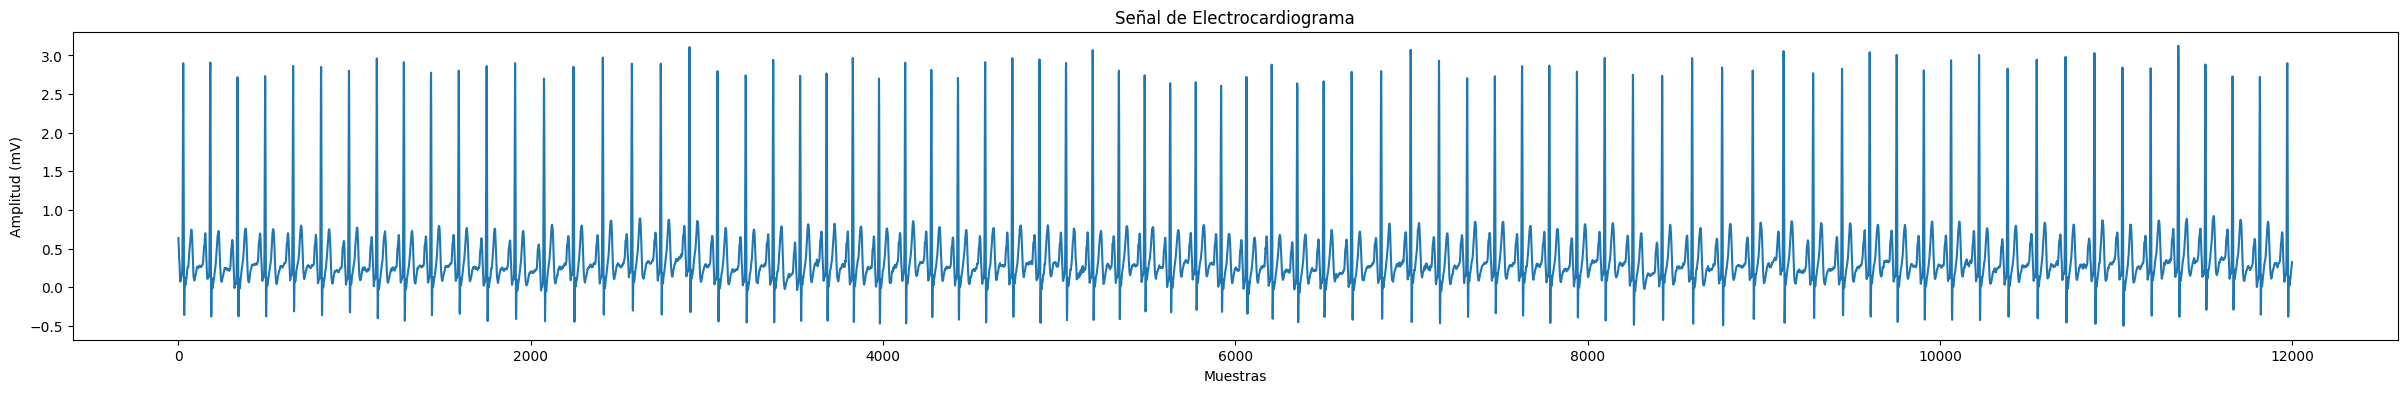

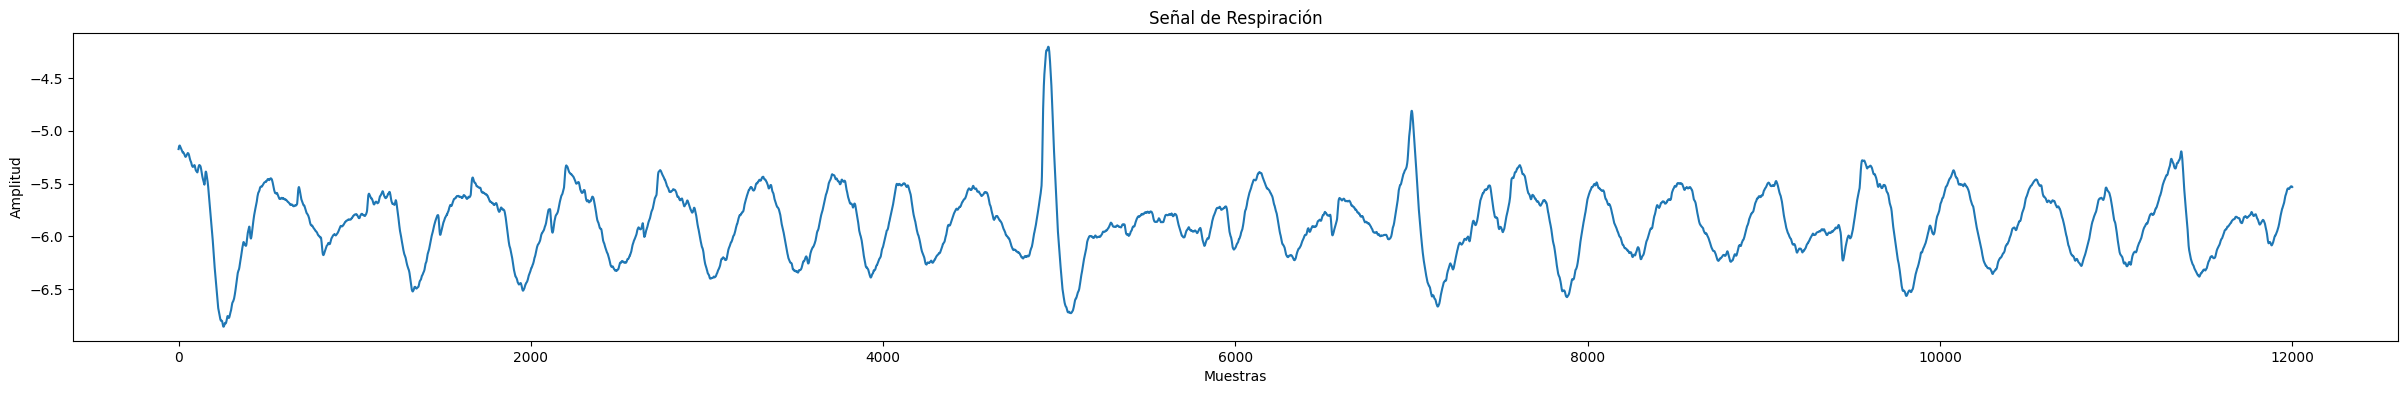

In [6]:
import matplotlib.pyplot as plt

# 3) Graficar Electrocardiograma en una figura
plt.figure(figsize=(30, 4))
plt.plot(df["Electrocardiograma"])
plt.title("Señal de Electrocardiograma")
plt.xlabel("Muestras")
plt.ylabel("Amplitud (mV)")
plt.show()

# 4) Graficar Respiración en otra figura
plt.figure(figsize=(30, 4))
plt.plot(df["Respiracion"])
plt.title("Señal de Respiración")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.show()


MSE de imputación: 0.2010
R² de imputación:  -0.0097


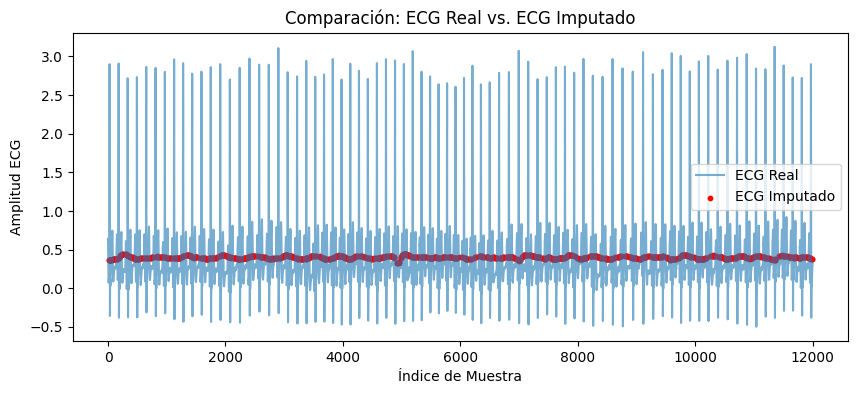

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


# -----------------------------------------------------------------------------
# 2) Asignar X e y (X = Respiración, y = Electrocardiograma)
# -----------------------------------------------------------------------------
X = df[["Respiracion"]].values  # Usamos la respiración como input (2D para sklearn)
y = df["Electrocardiograma"].values  # Queremos predecir/imputar el ECG

# -----------------------------------------------------------------------------
# 3) Simular el 10% de datos faltantes (NaN) en la columna Electrocardiograma (y)
# -----------------------------------------------------------------------------
np.random.seed(42)  # reproducibilidad
n = len(y)
num_missing = int(0.10 * n)  # 10% del total
missing_indices = np.random.choice(n, size=num_missing, replace=False)

# Guardamos los valores reales para comparar después
y_true_missing = y[missing_indices].copy()

# Reemplazamos con NaN esos valores
y_with_missing = y.copy()
y_with_missing[missing_indices] = np.nan

# -----------------------------------------------------------------------------
# 4) Extraer datos de entrenamiento (filas sin NaN en ECG)
# -----------------------------------------------------------------------------
mask_not_missing = ~np.isnan(y_with_missing)  # verdadero donde NO es NaN

X_train = X[mask_not_missing, :]      # Respiración en filas que tienen ECG
y_train = y_with_missing[mask_not_missing]  # ECG sin los NaN

# -----------------------------------------------------------------------------
# 5) Entrenar red neuronal feed-forward (MLPRegressor)
# -----------------------------------------------------------------------------
model = MLPRegressor(
    hidden_layer_sizes=(32, 16),  # arquitectura
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

# -----------------------------------------------------------------------------
# 6) Imputar (predecir) los valores faltantes de la columna ECG
# -----------------------------------------------------------------------------
X_missing = X[missing_indices, :]  # Respiración en las filas que faltan ECG
y_imputed = model.predict(X_missing)  # imputación

# -----------------------------------------------------------------------------
# 7) Calcular métricas de desempeño entre imputación y valor real
# -----------------------------------------------------------------------------
mse = mean_squared_error(y_true_missing, y_imputed)
r2 = r2_score(y_true_missing, y_imputed)

print(f"MSE de imputación: {mse:.4f}")
print(f"R² de imputación:  {r2:.4f}")

# -----------------------------------------------------------------------------
# 8) Reemplazar en y_with_missing para reconstruir un vector 'y_completo'
# -----------------------------------------------------------------------------
y_completo = y_with_missing.copy()
y_completo[missing_indices] = y_imputed

# -----------------------------------------------------------------------------
# 9) (Opcional) Visualizar comparación
# -----------------------------------------------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(y, label="ECG Real", alpha=0.6)
plt.scatter(missing_indices, y_completo[missing_indices],
            color='red', label="ECG Imputado", s=10)
plt.title("Comparación: ECG Real vs. ECG Imputado")
plt.xlabel("Índice de Muestra")
plt.ylabel("Amplitud ECG")
plt.legend()
plt.show()

In [8]:
#MSE-Mean Squared Error de 0.2010 es relativamente elvado ya que la escala va de -0.5 a 3
#R2-Coeficiente de determinación de -0.0097 sugiere que el modelo no está capturando prácticamente nada de la variabilidad de la variable objetivo.
#Un R2 negativo implica que el modelo está, en promedio, peor que predecir siempre la media o un valor constante. Si simplemente se hubiera imputado
#todos los valores faltantes con la media del ECG, se habría obtenido un R2 igual o superior a cero.

MSE de imputación: 0.3711
R² de imputación:  -0.8645


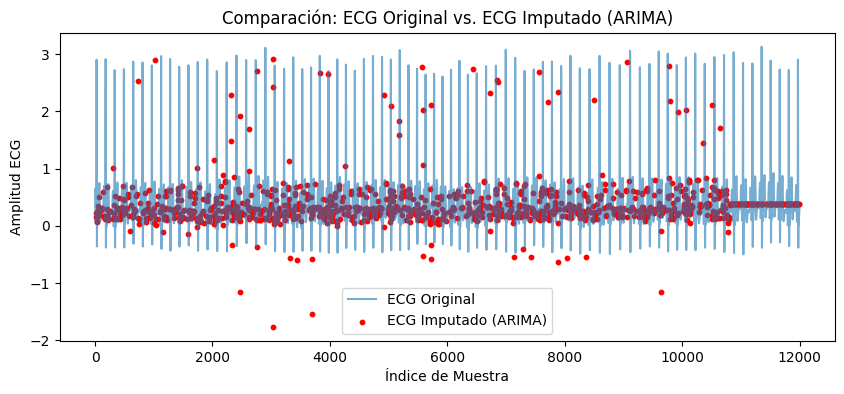

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# Para este ejemplo, asumimos que ya has definido 'ecg'
ecg = df["Electrocardiograma"].values

# 1) Creamos un 10% de valores faltantes
np.random.seed(42)
n = len(ecg)
num_missing = int(0.10 * n)
missing_indices = np.random.choice(n, size=num_missing, replace=False)

y_true_missing = ecg[missing_indices].copy()
ecg_with_missing = ecg.copy()
ecg_with_missing[missing_indices] = np.nan

# 2) Construimos un DataFrame para manejar mejor indices
ecg_df = pd.DataFrame({"ECG": ecg_with_missing})

# 3) Serie sin NaN para entrenar
ecg_df_no_nan = ecg_df.dropna().copy()

# Reindexamos de 0 a len(...) - 1 para un índice continuo
ecg_df_no_nan.index = range(len(ecg_df_no_nan))

# 4) Ajustar ARIMA sobre la serie limpia
#    order=(2, 0, 1) es un ejemplo (ARMA(p=2,q=1)), ajústalo a tus necesidades
model = ARIMA(ecg_df_no_nan["ECG"], order=(2, 0, 1))
results = model.fit()

# 5) Predecimos en el rango [0, n-1]
#    Esto produce una Serie con índice de 0 a n-1
predictions_full = results.predict(start=0, end=n-1)

# 6) Rellenar las posiciones faltantes con las predicciones
ecg_imputed = ecg_with_missing.copy()
# Aseguramos que 'predictions_full' tenga también un RangeIndex de 0..(n-1)
predictions_full.index = range(len(predictions_full))

for i in missing_indices:
    ecg_imputed[i] = predictions_full[i]

# 7) Evaluar: comparamos 'ecg_imputed[missing_indices]' con 'y_true_missing'
mse = mean_squared_error(y_true_missing, ecg_imputed[missing_indices])
# Nota: r2_score y MSE dependen de la escala y comportamiento de tu señal
r2 = r2_score(y_true_missing, ecg_imputed[missing_indices])

print(f"MSE de imputación: {mse:.4f}")
print(f"R² de imputación:  {r2:.4f}")

# 8) Visualizar
plt.figure(figsize=(10, 4))
plt.plot(ecg, label="ECG Original", alpha=0.6)
plt.scatter(missing_indices, ecg_imputed[missing_indices],
            color='red', label="ECG Imputado (ARIMA)", s=10)
plt.title("Comparación: ECG Original vs. ECG Imputado (ARIMA)")
plt.xlabel("Índice de Muestra")
plt.ylabel("Amplitud ECG")
plt.legend()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ecg_df_no_nan["ECG"].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -30.104164642588728
p-value: 0.0


In [11]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Para auto_arima
from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------------------------------------------------------
# 1) Supongamos que 'df' es tu DataFrame con la columna "Electrocardiograma"
# -----------------------------------------------------------------------------
# df = pd.read_csv("EDWARD (6).TXT", sep="\s+", header=None)
# df.columns = ["Electrocardiograma", "Respiracion"]

ecg = df["Electrocardiograma"].values

# 2) Simular un 10% de valores faltantes
np.random.seed(42)
n = len(ecg)
num_missing = int(0.10 * n)
missing_indices = np.random.choice(n, size=num_missing, replace=False)

y_true_missing = ecg[missing_indices].copy()
ecg_with_missing = ecg.copy()
ecg_with_missing[missing_indices] = np.nan

# 3) Construir un DataFrame y dropear NaN para entrenar
ecg_df = pd.DataFrame({"ECG": ecg_with_missing})
ecg_df_no_nan = ecg_df.dropna().copy()

# Reindexamos la serie “limpia” para tener un índice continuo
ecg_df_no_nan.index = range(len(ecg_df_no_nan))

# 4) Usar auto_arima para encontrar (p, d, q) y posibles parámetros estacionales
#    - seasonal=False asume que no hay estacionalidad en tu serie ECG
#    - puedes ajustar start_p, start_q, max_p, max_q, etc.
stepwise_model = auto_arima(
    ecg_df_no_nan["ECG"], 
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=None,             # auto_arima determinará la necesidad de diferenciar
    seasonal=False,     # ECG típicamente no se maneja con estacionalidad
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
print("\nMejor modelo encontrado por auto_arima:")
print(stepwise_model.summary())

# 5) Entrenar el modelo ARIMA con los parámetros elegidos por auto_arima
best_order = stepwise_model.order   # (p, d, q)
best_seasonal_order = stepwise_model.seasonal_order  # (P, D, Q, m), si aplica
print(f"\nOrden final (p,d,q): {best_order}")
if stepwise_model.seasonal:
    print(f"Orden estacional (P,D,Q,m): {best_seasonal_order}")

# Con pmdarima, el modelo ya está “ajustado” en stepwise_model.
# Pero para predecir en el rango completo 0..n-1, vamos a usar su .predict()

# 6) Hacemos predicción in-sample en [0..n-1].
#    Primero, creamos la misma longitud “ficticia” de la serie limpia:
ecg_df_no_nan_for_predict = ecg_df_no_nan.copy()
ecg_df_no_nan_for_predict.index = range(len(ecg_df_no_nan_for_predict))

# auto_arima, al entrenar, reindexa internamente de 0..(len_no_nan-1).
# Para predecir hasta el “equivalente” a n-1, hay que especificar un horizon
horizon = n - len(ecg_df_no_nan_for_predict)  
# horizon = número de pasos “más allá” de la última observación entrenada
# Sin embargo, si hay missing dispersos, este "horizon" es engañoso.
# Una forma más directa:
predictions = stepwise_model.predict_in_sample(
    start=0, 
    end=len(ecg_df_no_nan_for_predict)-1
)

# 'predictions' es un array de la longitud de ecg_df_no_nan_for_predict
# pero NO cubre los índices faltantes de 0..n-1.  
# Para una imputación en el índice original, necesitamos “mapear” estos valores
# a la posición real. 
# Sin un mapeo exacto, la forma más sencilla: 
# - Reentrenar un modelo "statsmodels" nativo con esos parámetros y .predict(start=0, end=n-1)
#   o
# - Reconstruir la serie final. 

# 7) Truco: Ajustar con statsmodels.tsa.arima.model.ARIMA con los (p,d,q) hallados
from statsmodels.tsa.arima.model import ARIMA

# Reindexar la serie sin NaN con un RangeIndex
ecg_df_no_nan2 = ecg_df_no_nan.copy()
ecg_df_no_nan2.index = range(len(ecg_df_no_nan2))

# Ajustamos ARIMA de statsmodels con los parámetros de auto_arima
arima_model = ARIMA(ecg_df_no_nan2["ECG"], order=best_order)
results = arima_model.fit()
# Predecimos del índice 0..(n-1)
full_predictions = results.predict(start=0, end=n-1)

# 8) Imputar con 'full_predictions' en las posiciones faltantes
ecg_imputed = ecg_with_missing.copy()
# Aseguramos que 'full_predictions' tenga un RangeIndex 0..n-1
full_predictions.index = range(len(full_predictions))

for i in missing_indices:
    ecg_imputed[i] = full_predictions[i]

# 9) Métricas de desempeño
mse = mean_squared_error(y_true_missing, ecg_imputed[missing_indices])
r2 = r2_score(y_true_missing, ecg_imputed[missing_indices])

print(f"\nMSE de imputación: {mse:.4f}")
print(f"R² de imputación:  {r2:.4f}")

# 10) Visualizar
plt.figure(figsize=(10, 4))
plt.plot(ecg, label="ECG Original", alpha=0.5)
plt.scatter(missing_indices, ecg_imputed[missing_indices],
            color='red', label="ECG Imputado (ARIMA)", s=10)
plt.title("Comparación: ECG Original vs. ECG Imputado (ARIMA auto_arima)")
plt.xlabel("Índice de Muestra")
plt.ylabel("Amplitud ECG")
plt.legend()
plt.show()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [13]:
pip install --no-cache-dir numpy==1.23.5 pmdarima


     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     ------------------------- -------------- 6.8/10.7 MB 34.9 MB/s eta 0:00:01
     --------------------------------------- 10.7/10.7 MB 39.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "c:\Users\bhgtb\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\bhgtb\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\bhgtb\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^^^^^
        File "c:\Users\bhgtb\AppData\Local\Programs\Python\Python312\Lib\si

MSE de imputación (Fourier): 0.1996
R² de imputación (Fourier):  -0.0029


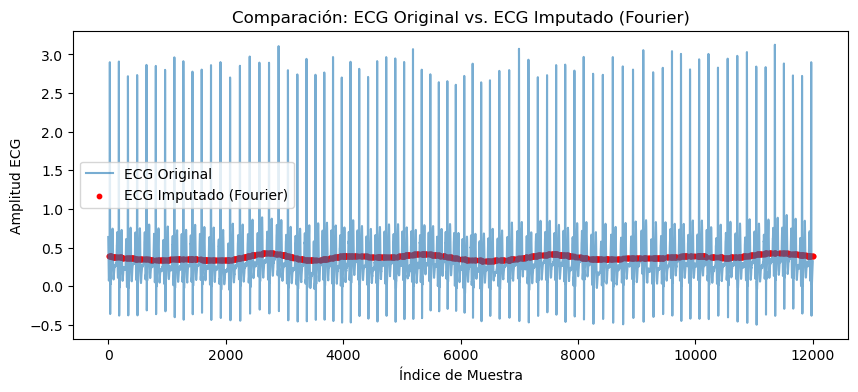

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ecg = df["Electrocardiograma"].values

np.random.seed(42)
n = len(ecg)
num_missing = int(0.10 * n)
missing_indices = np.random.choice(n, size=num_missing, replace=False)

# Guardamos los valores reales en esas posiciones para comparar luego
ecg_true_missing = ecg[missing_indices].copy()

# Creamos una copia con NaN
ecg_with_missing = ecg.copy()
ecg_with_missing[missing_indices] = np.nan

# -----------------------------------------------------------------------------
# 2) Construir la base de Fourier
#    - K: número de armónicos
#    - t: eje de tiempo [0..n-1]
#    - Frecuencia base asumida = 1 ciclo en n muestras
#      (Si conoces la frecuencia cardiaca, podrías ajustar la fórmula)
# -----------------------------------------------------------------------------
K = 10  # Número de armónicos a usar (ajusta según tu señal)
t = np.arange(n)

# Matriz de entrada (X_fourier) contendrá [1, cos(2πk t/n), sin(2πk t/n), ...]
# Primero, hacemos una lista y luego la apilamos en columnas:
X_list = [np.ones(n)]  # término de intercept (constante)

for k in range(1, K+1):
    # cos(2π k t / n)
    X_list.append(np.cos(2 * np.pi * k * t / n))
    # sin(2π k t / n)
    X_list.append(np.sin(2 * np.pi * k * t / n))

# Convertir la lista de (n,) arrays a shape (n, num_features)
X_fourier = np.column_stack(X_list)

# -----------------------------------------------------------------------------
# 3) Entrenar la regresión sólo con las filas donde ECG NO está ausente
# -----------------------------------------------------------------------------
mask_not_missing = ~np.isnan(ecg_with_missing)

X_train = X_fourier[mask_not_missing, :]
y_train = ecg_with_missing[mask_not_missing]

model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------------------------------------------------------
# 4) Imputar valores faltantes usando la base de Fourier
# -----------------------------------------------------------------------------
X_missing = X_fourier[missing_indices, :]
ecg_imputed_vals = model.predict(X_missing)

# Rellenamos en ecg_with_missing
ecg_imputed = ecg_with_missing.copy()
ecg_imputed[missing_indices] = ecg_imputed_vals

# -----------------------------------------------------------------------------
# 5) Evaluar la imputación (MSE, R²)
# -----------------------------------------------------------------------------
mse = mean_squared_error(ecg_true_missing, ecg_imputed_vals)
r2 = r2_score(ecg_true_missing, ecg_imputed_vals)

print(f"MSE de imputación (Fourier): {mse:.4f}")
print(f"R² de imputación (Fourier):  {r2:.4f}")

# -----------------------------------------------------------------------------
# 6) Visualizar la comparación de imputación
# -----------------------------------------------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(ecg, label="ECG Original", alpha=0.6)
plt.scatter(missing_indices, ecg_imputed[missing_indices], color='red',
            label="ECG Imputado (Fourier)", s=10)
plt.title("Comparación: ECG Original vs. ECG Imputado (Fourier)")
plt.xlabel("Índice de Muestra")
plt.ylabel("Amplitud ECG")
plt.legend()
plt.show()

MSE de imputación (Local Fourier): 0.1682
R² de imputación (Local Fourier):  0.1549


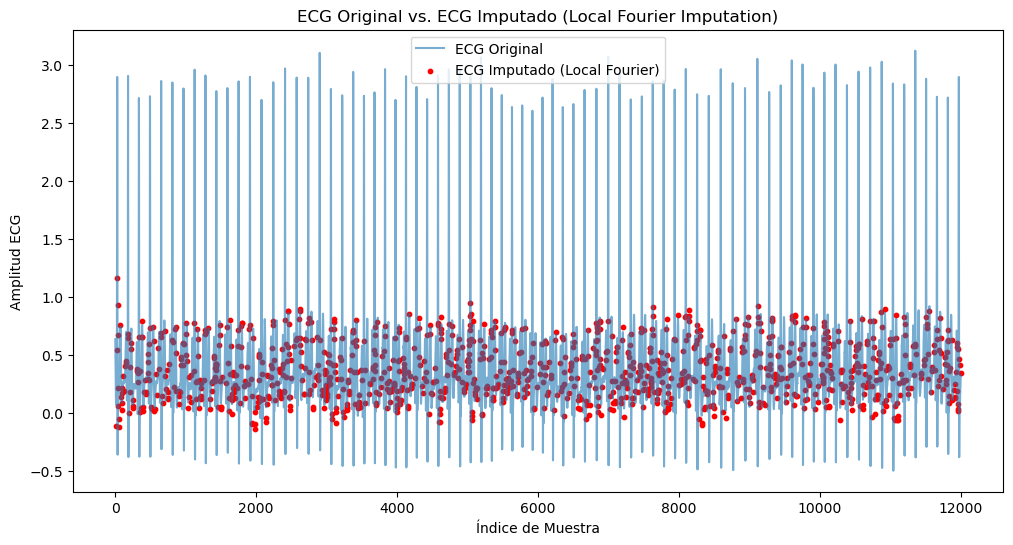

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

cg = df["Electrocardiograma"].values
np.random.seed(42)
n = len(ecg)
num_missing = int(0.10 * n)
missing_indices = np.random.choice(n, size=num_missing, replace=False)

# Guardamos los valores reales de los índices faltantes para evaluación
y_true_missing = ecg[missing_indices].copy()

# Creamos la serie con faltantes
ecg_with_missing = ecg.copy()
ecg_with_missing[missing_indices] = np.nan

# -----------------------------------------------------------------------------
# 2) Función para construir la matriz de diseño Fourier en un vector de tiempo t
#    dada una cantidad de armónicos K.
# -----------------------------------------------------------------------------
def fourier_design_matrix(t, K):
    # t: vector de tiempo (puede ser 0,1,...,L-1 para una ventana de longitud L)
    # K: número de armónicos a usar
    L = len(t)
    X = np.ones((L, 1))  # término constante
    for k in range(1, K+1):
        X = np.hstack((X, np.cos(2 * np.pi * k * t / L).reshape(-1, 1),
                         np.sin(2 * np.pi * k * t / L).reshape(-1, 1)))
    return X

# -----------------------------------------------------------------------------
# 3) Imputación local vía regresión Fourier
#    Para cada índice faltante, definimos una ventana local (por ejemplo, 200 muestras)
#    y ajustamos un modelo lineal sobre la base Fourier (con K armónicos) usando los
#    valores observados en esa ventana. Luego se predice el valor en la posición faltante.
# -----------------------------------------------------------------------------
window_size = 200      # tamaño de la ventana local (ajustable según la densidad y ritmo)
half_window = window_size // 2
K = 5                  # número de armónicos locales (puedes probar con 5, 10, etc.)

imputed_local = ecg_with_missing.copy()

for idx in missing_indices:
    # Definir ventana local: desde max(0, idx - half_window) hasta min(n, idx + half_window)
    start = max(0, idx - half_window)
    end = min(n, idx + half_window)
    local_indices = np.arange(start, end)
    local_signal = ecg_with_missing[start:end]
    
    # Determinar qué valores están observados en la ventana
    observed_mask = ~np.isnan(local_signal)
    if observed_mask.sum() < (2*K + 1):
        # Si hay muy pocos datos en la ventana, se usa interpolación global simple
        imputed_local[idx] = np.interp(idx, 
                                       np.where(~np.isnan(ecg_with_missing))[0],
                                       ecg_with_missing[~np.isnan(ecg_with_missing)])
        continue
    
    # Definir un vector de tiempo local (relativo a la ventana)
    t_local = np.arange(len(local_indices))
    # Construir la matriz de diseño Fourier para la ventana
    X_local = fourier_design_matrix(t_local, K)
    
    # Seleccionar los datos observados
    X_train = X_local[observed_mask]
    y_train = local_signal[observed_mask]
    
    # Ajustar regresión lineal
    model_local = LinearRegression()
    model_local.fit(X_train, y_train)
    
    # Predecir en la posición correspondiente (local_idx)
    local_idx = idx - start  # posición del punto faltante en la ventana local
    X_pred = X_local[local_idx].reshape(1, -1)
    imputed_value = model_local.predict(X_pred)[0]
    
    # Actualizar la imputación en el índice faltante
    imputed_local[idx] = imputed_value

# -----------------------------------------------------------------------------
# 4) Evaluar la imputación en los puntos faltantes
# -----------------------------------------------------------------------------
mse_local = mean_squared_error(y_true_missing, imputed_local[missing_indices])
r2_local = r2_score(y_true_missing, imputed_local[missing_indices])

print(f"MSE de imputación (Local Fourier): {mse_local:.4f}")
print(f"R² de imputación (Local Fourier):  {r2_local:.4f}")

# -----------------------------------------------------------------------------
# 5) Visualizar resultados
# -----------------------------------------------------------------------------
plt.figure(figsize=(12,6))
plt.plot(ecg, label="ECG Original", alpha=0.6)
plt.scatter(missing_indices, imputed_local[missing_indices], 
            color='red', label="ECG Imputado (Local Fourier)", s=10)
plt.title("ECG Original vs. ECG Imputado (Local Fourier Imputation)")
plt.xlabel("Índice de Muestra")
plt.ylabel("Amplitud ECG")
plt.legend()
plt.show()

MSE de imputación (polinomial): 0.0002
R² de imputación (polinomial):  0.9991


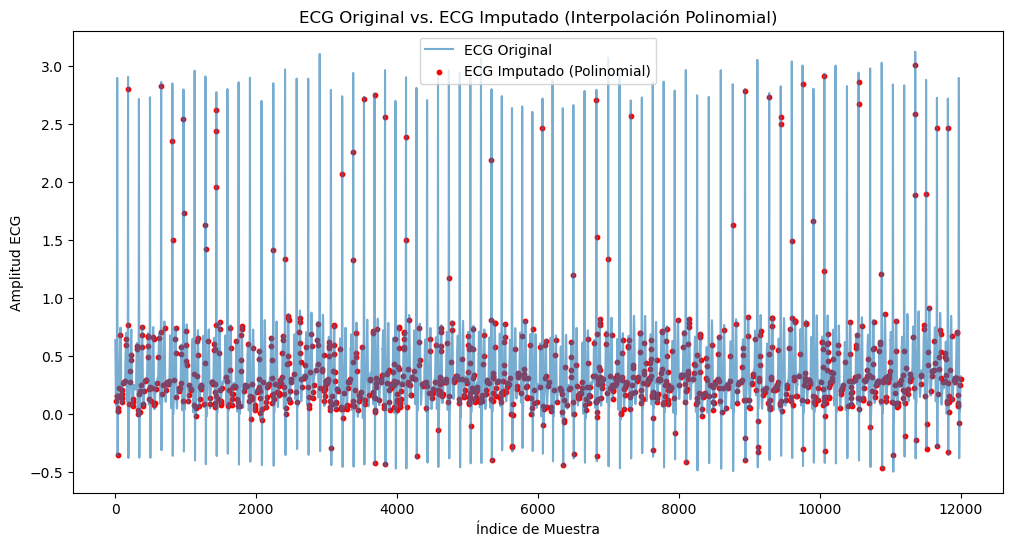

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

ecg = df["Electrocardiograma"].values

np.random.seed(42)
n = len(ecg)
num_missing = int(0.10 * n)
missing_indices = np.random.choice(n, size=num_missing, replace=False)

# Guardar los valores reales de los puntos que se van a "ocultar"
y_true_missing = ecg[missing_indices].copy()

# Crear una copia de la señal y simular los NaN
ecg_with_missing = ecg.copy()
ecg_with_missing[missing_indices] = np.nan

# -----------------------------------------------------------------------------
# 2) Imputación con interpolación polinomial
# -----------------------------------------------------------------------------
# Convertimos la señal a una Serie de pandas
ecg_series = pd.Series(ecg_with_missing)

# Usamos interpolación polinomial con un orden (por ejemplo, 3)
# El parámetro limit_direction='both' asegura que se interpole tanto hacia adelante como hacia atrás
ecg_interpolated = ecg_series.interpolate(method='polynomial', order=3, limit_direction='both')

# Convertimos la serie interpolada de vuelta a array
ecg_imputed_poly = ecg_interpolated.values

# -----------------------------------------------------------------------------
# 3) Evaluación del método
# -----------------------------------------------------------------------------
mse_poly = mean_squared_error(y_true_missing, ecg_imputed_poly[missing_indices])
r2_poly = r2_score(y_true_missing, ecg_imputed_poly[missing_indices])

print(f"MSE de imputación (polinomial): {mse_poly:.4f}")
print(f"R² de imputación (polinomial):  {r2_poly:.4f}")

# -----------------------------------------------------------------------------
# 4) Visualización
# -----------------------------------------------------------------------------
plt.figure(figsize=(12,6))
plt.plot(ecg, label="ECG Original", alpha=0.6)
plt.scatter(missing_indices, ecg_imputed_poly[missing_indices], 
            color='red', label="ECG Imputado (Polinomial)", s=10)
plt.title("ECG Original vs. ECG Imputado (Interpolación Polinomial)")
plt.xlabel("Índice de Muestra")
plt.ylabel("Amplitud ECG")
plt.legend()
plt.show()

MSE de imputación (polinomial): 0.0008
R² de imputación (polinomial):  0.9958


C:\Users\Samuel Pimienta\AppData\Local\Temp\ipykernel_171584\1497748780.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ecg_interpolated = ecg_interpolated.fillna(method='bfill').fillna(method='ffill')


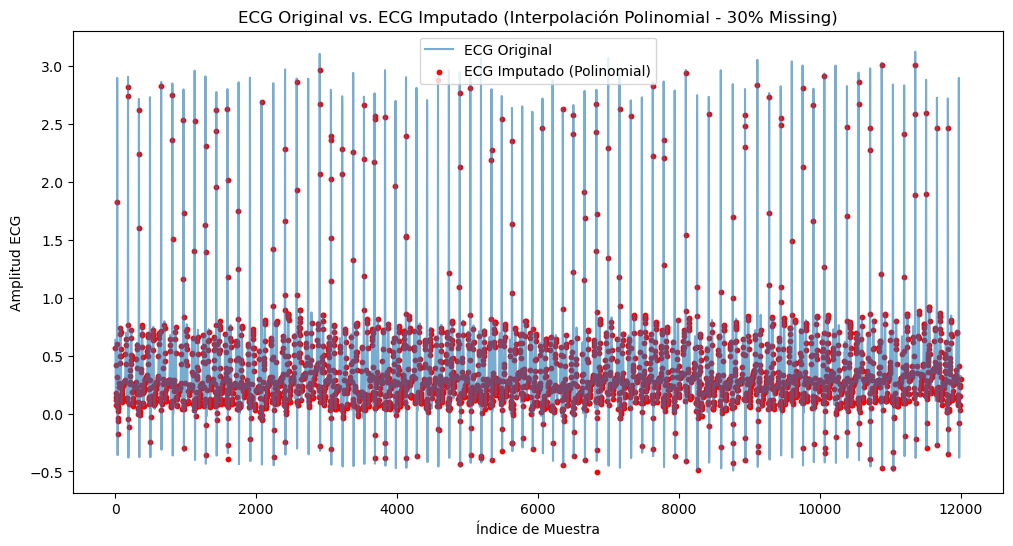

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

ecg = df["Electrocardiograma"].values

np.random.seed(42)
n = len(ecg)
num_missing = int(0.30 * n)  # 30% de datos faltantes
missing_indices = np.random.choice(n, size=num_missing, replace=False)

# Guardar los valores reales en los índices que se van a ocultar
y_true_missing = ecg[missing_indices].copy()

# Crear una copia de la señal y simular los NaN
ecg_with_missing = ecg.copy()
ecg_with_missing[missing_indices] = np.nan

# Convertimos la señal a una Serie de pandas
ecg_series = pd.Series(ecg_with_missing)

# Imputación con interpolación polinomial de orden 3
ecg_interpolated = ecg_series.interpolate(method='polynomial', order=3, limit_direction='both')

# Si aún quedan NaN (por bloques largos), aplicamos un relleno de respaldo (backfill/forward fill)
if ecg_interpolated.isnull().sum() > 0:
    ecg_interpolated = ecg_interpolated.fillna(method='bfill').fillna(method='ffill')

# Convertimos la serie interpolada de vuelta a array
ecg_imputed_poly = ecg_interpolated.values

# Evaluación del método
mse_poly = mean_squared_error(y_true_missing, ecg_imputed_poly[missing_indices])
r2_poly = r2_score(y_true_missing, ecg_imputed_poly[missing_indices])

print(f"MSE de imputación (polinomial): {mse_poly:.4f}")
print(f"R² de imputación (polinomial):  {r2_poly:.4f}")

# Visualización
plt.figure(figsize=(12,6))
plt.plot(ecg, label="ECG Original", alpha=0.6)
plt.scatter(missing_indices, ecg_imputed_poly[missing_indices], 
            color='red', label="ECG Imputado (Polinomial)", s=10)
plt.title("ECG Original vs. ECG Imputado (Interpolación Polinomial - 30% Missing)")
plt.xlabel("Índice de Muestra")
plt.ylabel("Amplitud ECG")
plt.legend()
plt.show()

MSE de imputación (polinomial): 0.0116
R² de imputación (polinomial):  0.9360


C:\Users\Samuel Pimienta\AppData\Local\Temp\ipykernel_171584\575880029.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ecg_interpolated = ecg_interpolated.fillna(method='bfill').fillna(method='ffill')


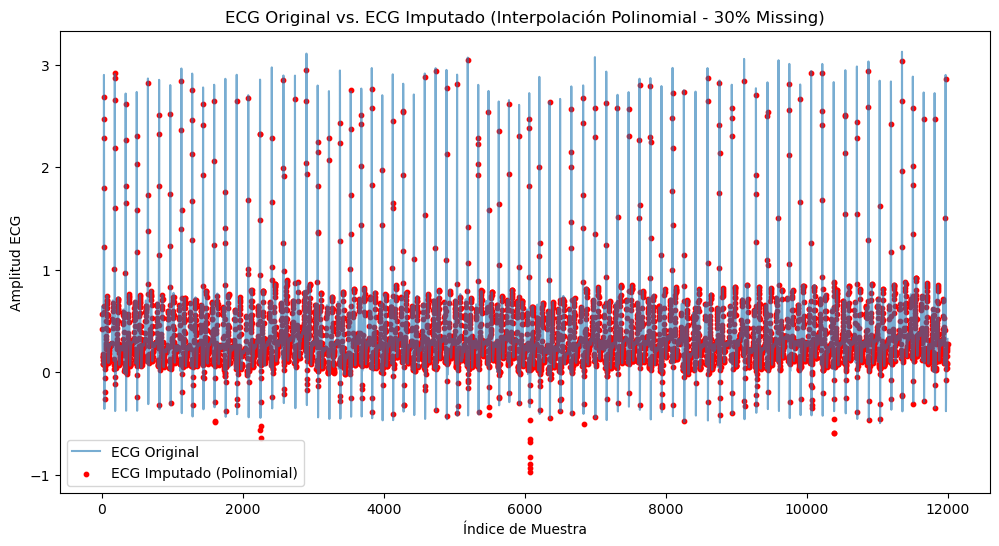

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que 'df' es tu DataFrame con la columna "Electrocardiograma"
# Ejemplo:
# df = pd.read_csv("EDWARD (6).TXT", sep="\s+", header=None)
# df.columns = ["Electrocardiograma", "Respiracion"]

ecg = df["Electrocardiograma"].values

np.random.seed(42)
n = len(ecg)
num_missing = int(0.50 * n)  # 30% de datos faltantes
missing_indices = np.random.choice(n, size=num_missing, replace=False)

# Guardar los valores reales en los índices que se van a ocultar
y_true_missing = ecg[missing_indices].copy()

# Crear una copia de la señal y simular los NaN
ecg_with_missing = ecg.copy()
ecg_with_missing[missing_indices] = np.nan

# Convertimos la señal a una Serie de pandas
ecg_series = pd.Series(ecg_with_missing)

# Imputación con interpolación polinomial de orden 3
ecg_interpolated = ecg_series.interpolate(method='polynomial', order=3, limit_direction='both')

# Si aún quedan NaN (por bloques largos), aplicamos un relleno de respaldo (backfill/forward fill)
if ecg_interpolated.isnull().sum() > 0:
    ecg_interpolated = ecg_interpolated.fillna(method='bfill').fillna(method='ffill')

# Convertimos la serie interpolada de vuelta a array
ecg_imputed_poly = ecg_interpolated.values

# Evaluación del método
mse_poly = mean_squared_error(y_true_missing, ecg_imputed_poly[missing_indices])
r2_poly = r2_score(y_true_missing, ecg_imputed_poly[missing_indices])

print(f"MSE de imputación (polinomial): {mse_poly:.4f}")
print(f"R² de imputación (polinomial):  {r2_poly:.4f}")

# Visualización
plt.figure(figsize=(12,6))
plt.plot(ecg, label="ECG Original", alpha=0.6)
plt.scatter(missing_indices, ecg_imputed_poly[missing_indices], 
            color='red', label="ECG Imputado (Polinomial)", s=10)
plt.title("ECG Original vs. ECG Imputado (Interpolación Polinomial - 30% Missing)")
plt.xlabel("Índice de Muestra")
plt.ylabel("Amplitud ECG")
plt.legend()
plt.show()


MSE de imputación (polinomial): 0.0711
R² de imputación (polinomial):  0.6125


C:\Users\Samuel Pimienta\AppData\Local\Temp\ipykernel_171584\251582498.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ecg_interpolated = ecg_interpolated.fillna(method='bfill').fillna(method='ffill')


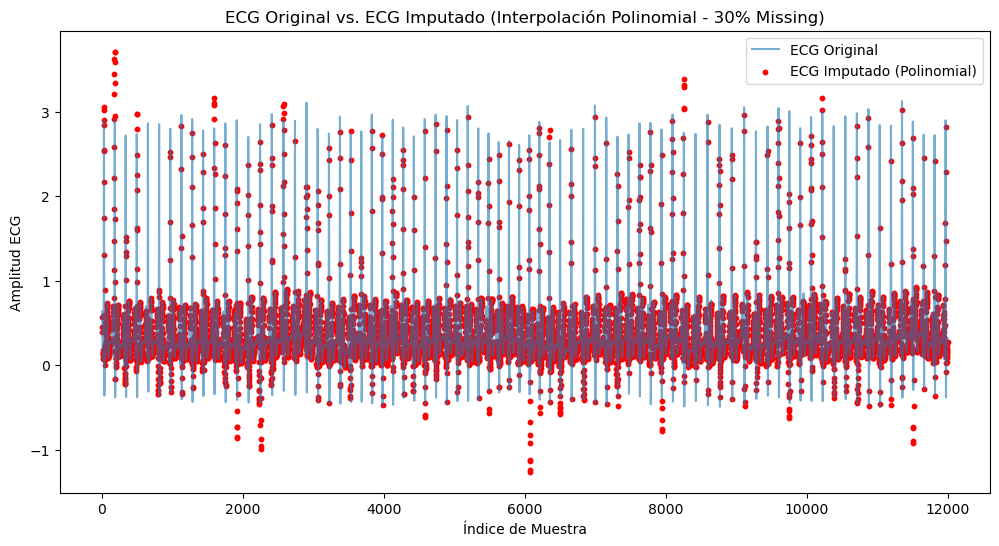

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que 'df' es tu DataFrame con la columna "Electrocardiograma"
# Ejemplo:
# df = pd.read_csv("EDWARD (6).TXT", sep="\s+", header=None)
# df.columns = ["Electrocardiograma", "Respiracion"]

ecg = df["Electrocardiograma"].values

np.random.seed(42)
n = len(ecg)
num_missing = int(0.70 * n)  # 30% de datos faltantes
missing_indices = np.random.choice(n, size=num_missing, replace=False)

# Guardar los valores reales en los índices que se van a ocultar
y_true_missing = ecg[missing_indices].copy()

# Crear una copia de la señal y simular los NaN
ecg_with_missing = ecg.copy()
ecg_with_missing[missing_indices] = np.nan

# Convertimos la señal a una Serie de pandas
ecg_series = pd.Series(ecg_with_missing)

# Imputación con interpolación polinomial de orden 3
ecg_interpolated = ecg_series.interpolate(method='polynomial', order=3, limit_direction='both')

# Si aún quedan NaN (por bloques largos), aplicamos un relleno de respaldo (backfill/forward fill)
if ecg_interpolated.isnull().sum() > 0:
    ecg_interpolated = ecg_interpolated.fillna(method='bfill').fillna(method='ffill')

# Convertimos la serie interpolada de vuelta a array
ecg_imputed_poly = ecg_interpolated.values

# Evaluación del método
mse_poly = mean_squared_error(y_true_missing, ecg_imputed_poly[missing_indices])
r2_poly = r2_score(y_true_missing, ecg_imputed_poly[missing_indices])

print(f"MSE de imputación (polinomial): {mse_poly:.4f}")
print(f"R² de imputación (polinomial):  {r2_poly:.4f}")

# Visualización
plt.figure(figsize=(12,6))
plt.plot(ecg, label="ECG Original", alpha=0.6)
plt.scatter(missing_indices, ecg_imputed_poly[missing_indices], 
            color='red', label="ECG Imputado (Polinomial)", s=10)
plt.title("ECG Original vs. ECG Imputado (Interpolación Polinomial - 30% Missing)")
plt.xlabel("Índice de Muestra")
plt.ylabel("Amplitud ECG")
plt.legend()
plt.show()
